In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from nilearn import datasets, image

import nibabel as nb
import os.path as ob

In [3]:
import os

In [4]:
data = datasets.fetch_atlas_msdl()

print(data['description'].decode('utf-8'))


Dataset created in C:\Users\jzm0144/nilearn_data\msdl_atlas



Downloaded 209734 of 209734 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from C:\Users\jzm0144/nilearn_data\msdl_atlas\add197e26e929bafc81904ca8750b145\MSDL_rois.zip..... done.


MSDL atlas


Notes
-----
Result maps of sparse dictionary learning based on resting-state data.

This can be understand as a variant of ICA based on the assumption
of sparsity rather than independence.


Content
-------
    :'maps': Nifti images with the (probabilistic) region definitions
    :'labels': CSV file specifying the label information


References
----------
For more information about this dataset's structure:
https://team.inria.fr/parietal/18-2/spatial_patterns/spatial-patterns-in-resting-state/

Multi-subject dictionary learning to segment an atlas of brain spontaneous activity Gael Varoquaux, Alexandre Gramfort, Fabian Pedregosa, Vincent Michel, Bertrand Thirion Information Processing in Medical Imaging, 2011, pp. 562-573, Lecture Notes in Computer Science

Learning and comparing functional connectomes across subjects. Gael Varoquaux, R.C. Craddock NeuroImage, 2013

Licence: usage is unrestricted for non-commercial research purposes.



In [5]:
map_filename = data['maps']
print(map_filename)

C:\Users\jzm0144/nilearn_data\msdl_atlas\MSDL_rois\msdl_rois.nii


In [6]:
# Now loading the data (the Nifti file)
brain = nb.load(map_filename)

In [7]:
brain.affine

array([[   4.,    0.,    0.,  -78.],
       [   0.,    4.,    0., -111.],
       [   0.,    0.,    4.,  -51.],
       [   0.,    0.,    0.,    1.]])

In [9]:
brain.get_data()[:2]

memmap([[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0.

In [10]:
# This is the dimensionality of the volume
# it is 4D, AKA activity in x/y/z space over some final dimension
brain.get_data().shape

(40, 48, 35, 39)

In [12]:
type(brain)

nibabel.nifti1.Nifti1Image

# Visualizing the File 

In [14]:
from nilearn import plotting

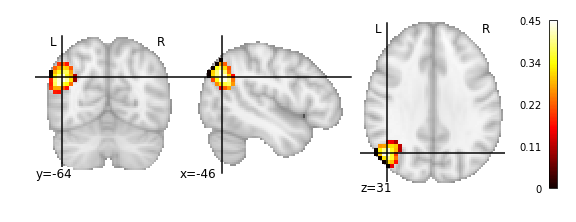

In [15]:
# Here we will load the nifty object according to the statistical map
# map = nb.load(map_filename)

# Then plot it
plotting.plot_stat_map(image.index_img(brain, 3))

# Alternatively, we could simply point it to the filename
# plotting.plot_stat_map(image.index_img(map_filename, 3))

# Manipulating the Image

Manipulating with thresholds

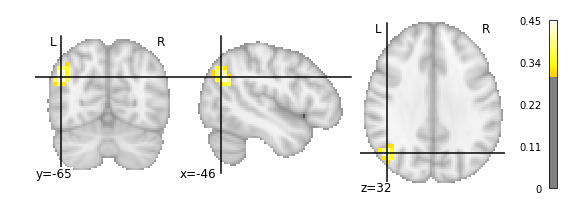

In [16]:
plotting.plot_stat_map(image.index_img(map_filename, 3), threshold = 0.3)

Lets take a look from another view

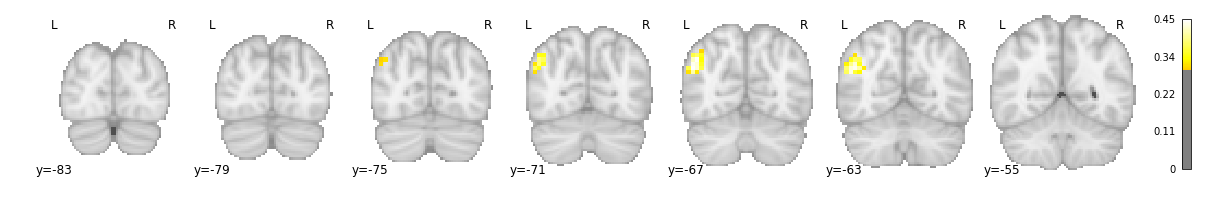

In [17]:
# For the y-axis
plotting.plot_stat_map(image.index_img(map_filename, 3), threshold = .3, display_mode='y')

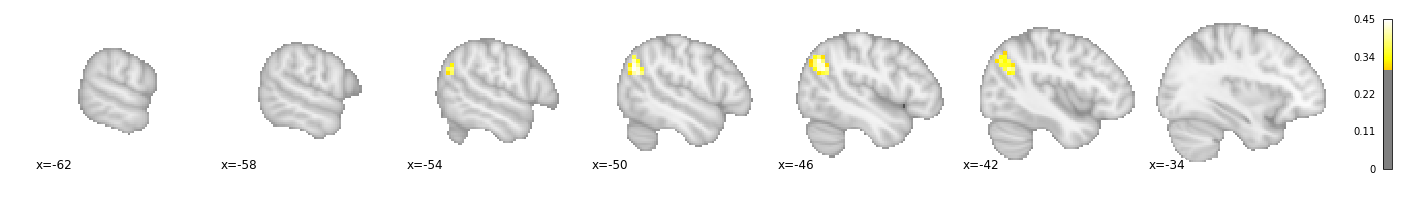

In [18]:
# For the x-axis
plotting.plot_stat_map(image.index_img(map_filename, 3), threshold = .3, display_mode='x')

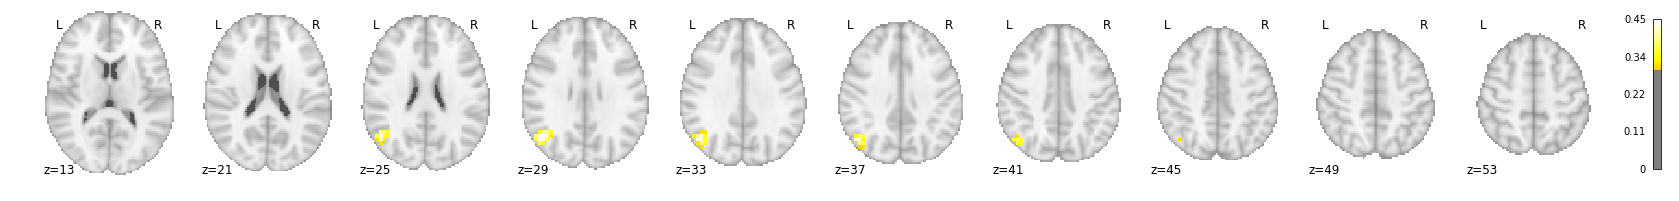

In [20]:
# For the z-axis
plotting.plot_stat_map(image.index_img(map_filename, 3), threshold = .3,
                       display_mode='z', cut_coords = 10)

# Iterating on all volumes in a 4D file

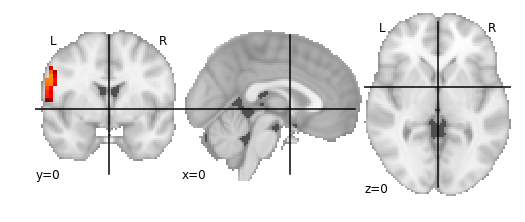

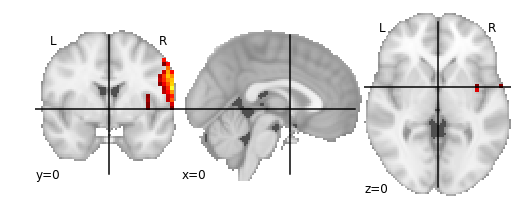

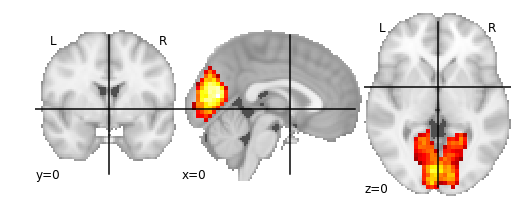

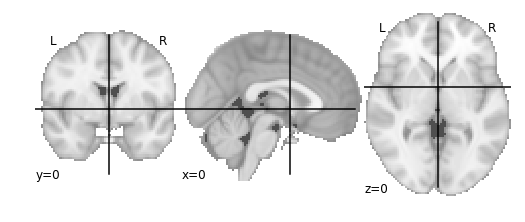

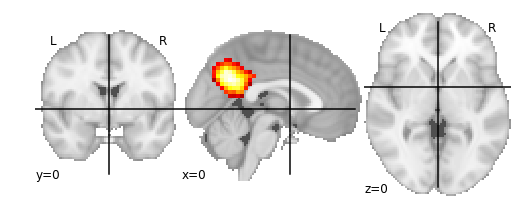

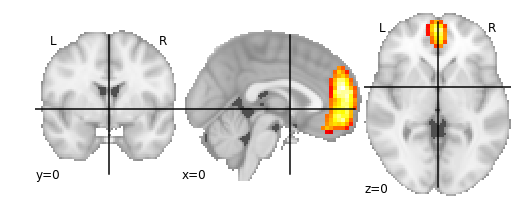

In [21]:
for ii, img in enumerate(image.iter_img(map_filename)):
    if ii > 5:
        # This causes us to skip after the first 5 plots
        continue
    # img is now in memory 3D img
    plotting.plot_stat_map(img, threshold = 0.1, colorbar = False,
                          cut_coords = (0, 0, 0))

Let's look at all of it in series

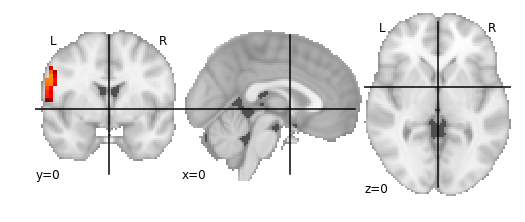

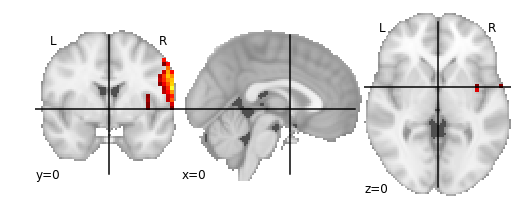

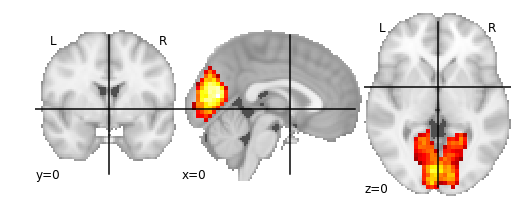

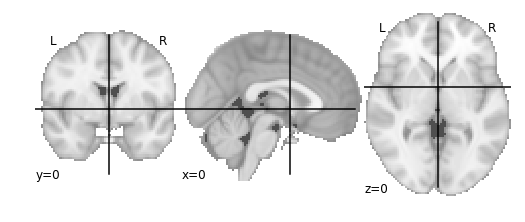

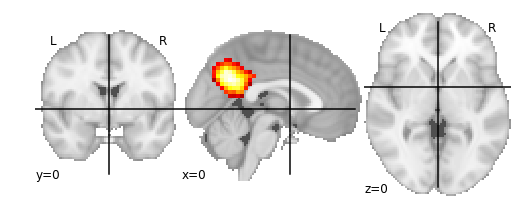

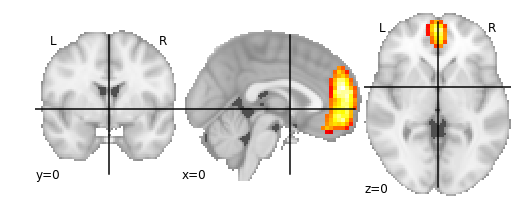

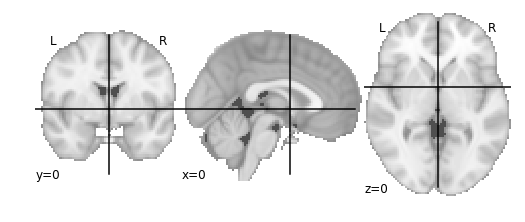

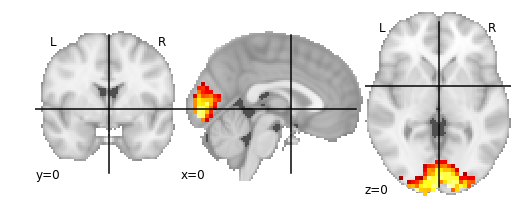

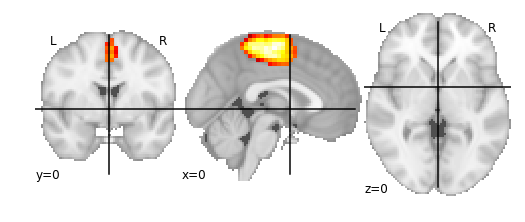

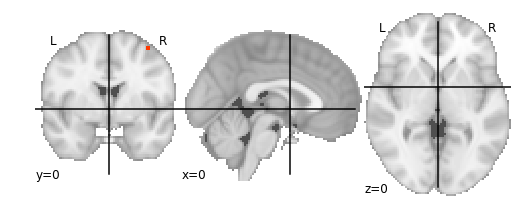

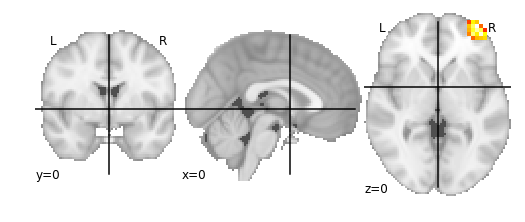

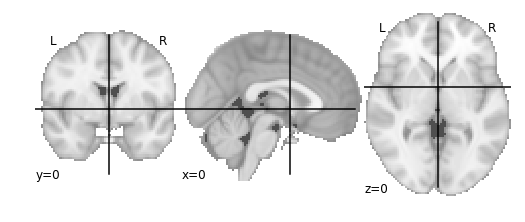

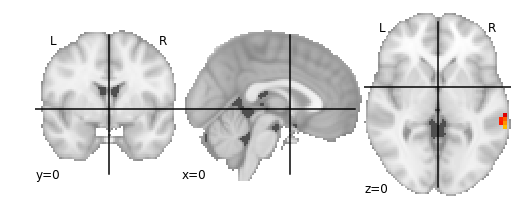

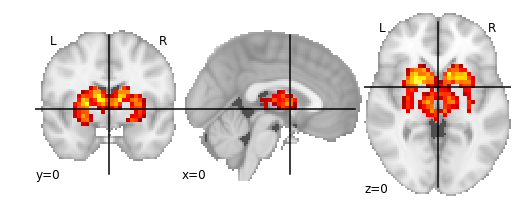

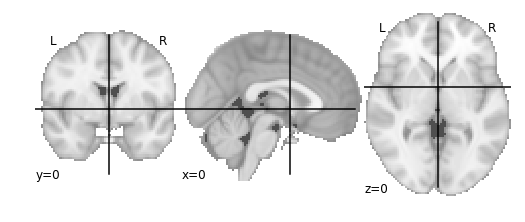

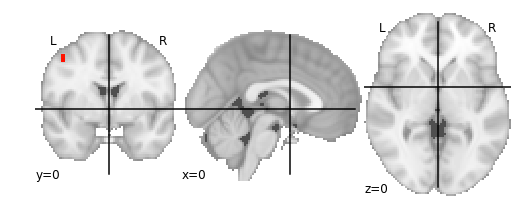

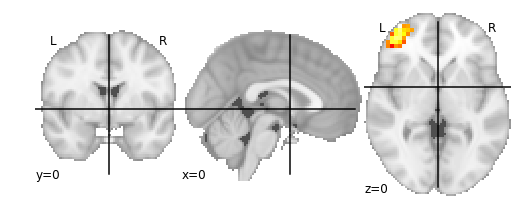

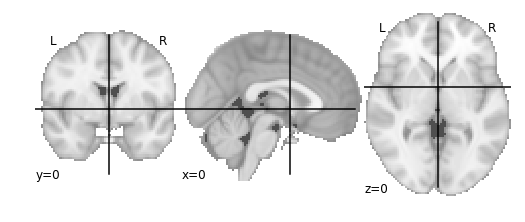

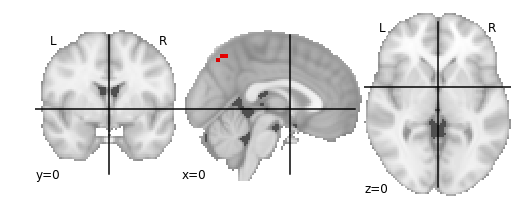

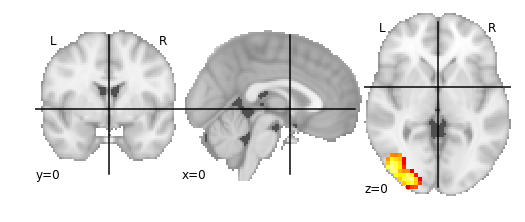

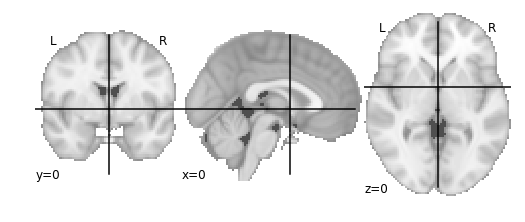

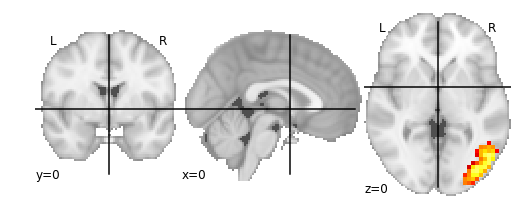

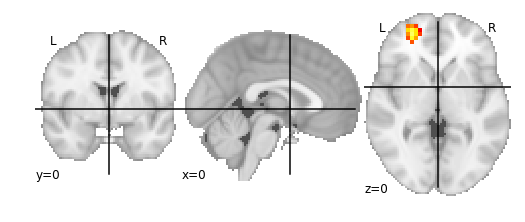

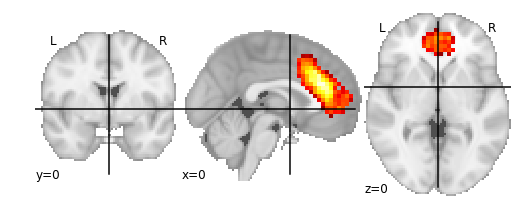

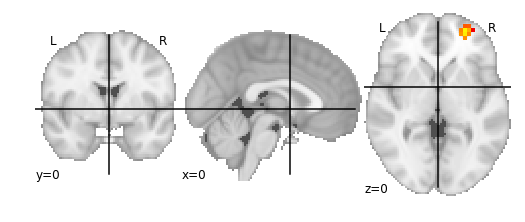

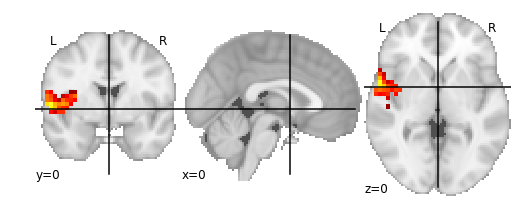

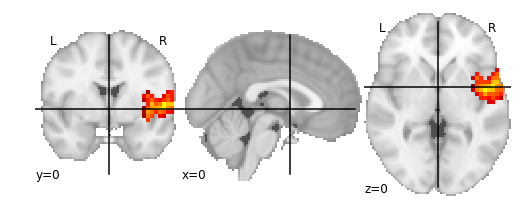

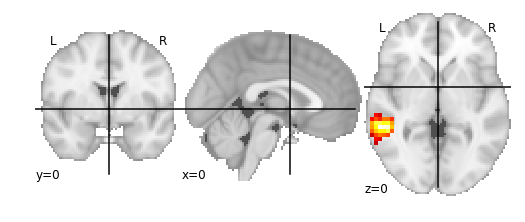

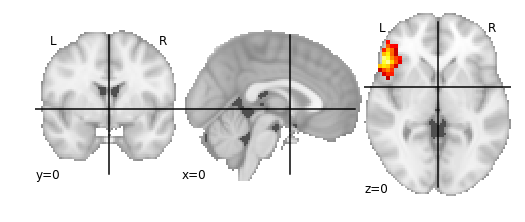

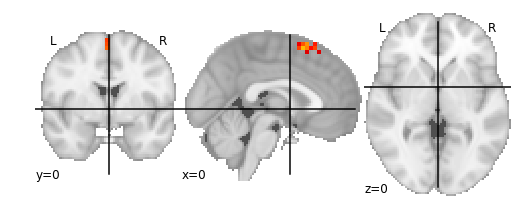

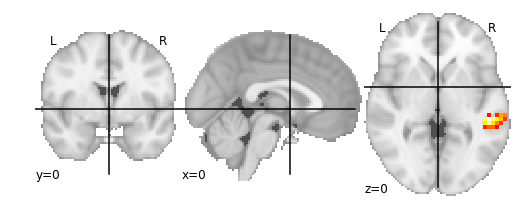

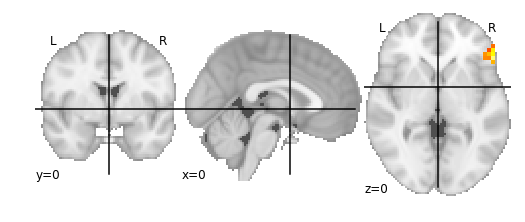

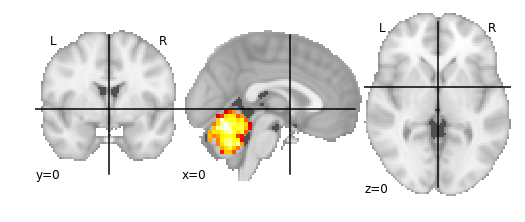

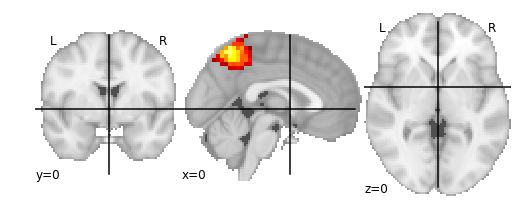

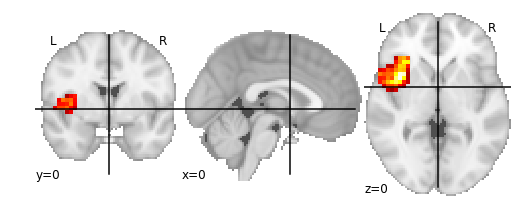

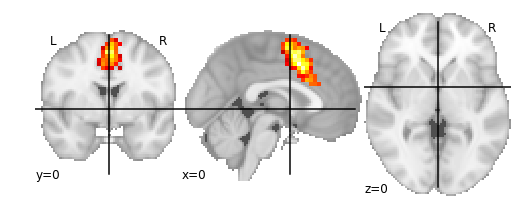

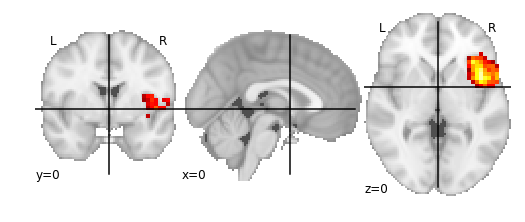

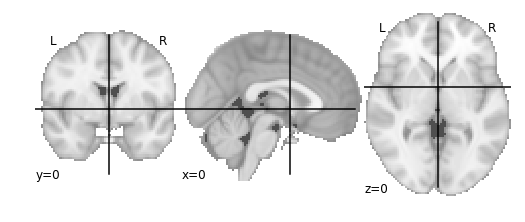

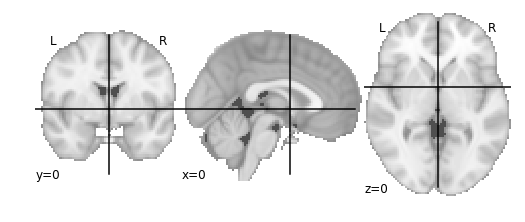

In [22]:
for ii, img in enumerate(image.iter_img(map_filename)):
    # img is now in memory 3D img
    plotting.plot_stat_map(img, threshold = 0.1, colorbar = False,
                          cut_coords = (0, 0, 0))